In [50]:
import splitfolders
Data='D:/download 3/archive (6)/brain_tumor_dataset/'
data_devided ='D:/download 3/archive (6)/Data Devided/'
splitfolders.ratio(Data,data_devided, seed=1337,ratio=(0.7,0.3,0) )

Copying files: 1586 files [00:17, 89.97 files/s] 


In [51]:
import os 
import cv2
import imutils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input , MobileNetV2

In [52]:
train_loc = 'D:/download 3/archive (6)/Data Devided/train/'

val_loc='D:/download 3/archive (6)/Data Devided/val/'
IMG_SIZE = (224,224)


In [53]:
RANDOM_SEED = 123
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    
    rescale= 1./255
    
)




train_generator = train_datagen.flow_from_directory(
    train_loc,
    color_mode='rgb',
  
    batch_size=64,
    class_mode='binary',
    seed=RANDOM_SEED,
   target_size= (128,128)
)
test_datagen = ImageDataGenerator(
    
    rescale= 1./255
)

validation_generator = test_datagen.flow_from_directory(
    val_loc,
    color_mode='rgb',
    batch_size=64,
    class_mode='binary',
    seed=RANDOM_SEED,
    shuffle=False,
    target_size= (128,128)
)

Found 1268 images belonging to 2 classes.
Found 633 images belonging to 2 classes.


In [54]:
train_generator .class_indices

{'no_tumor': 0, 'tumor': 1}

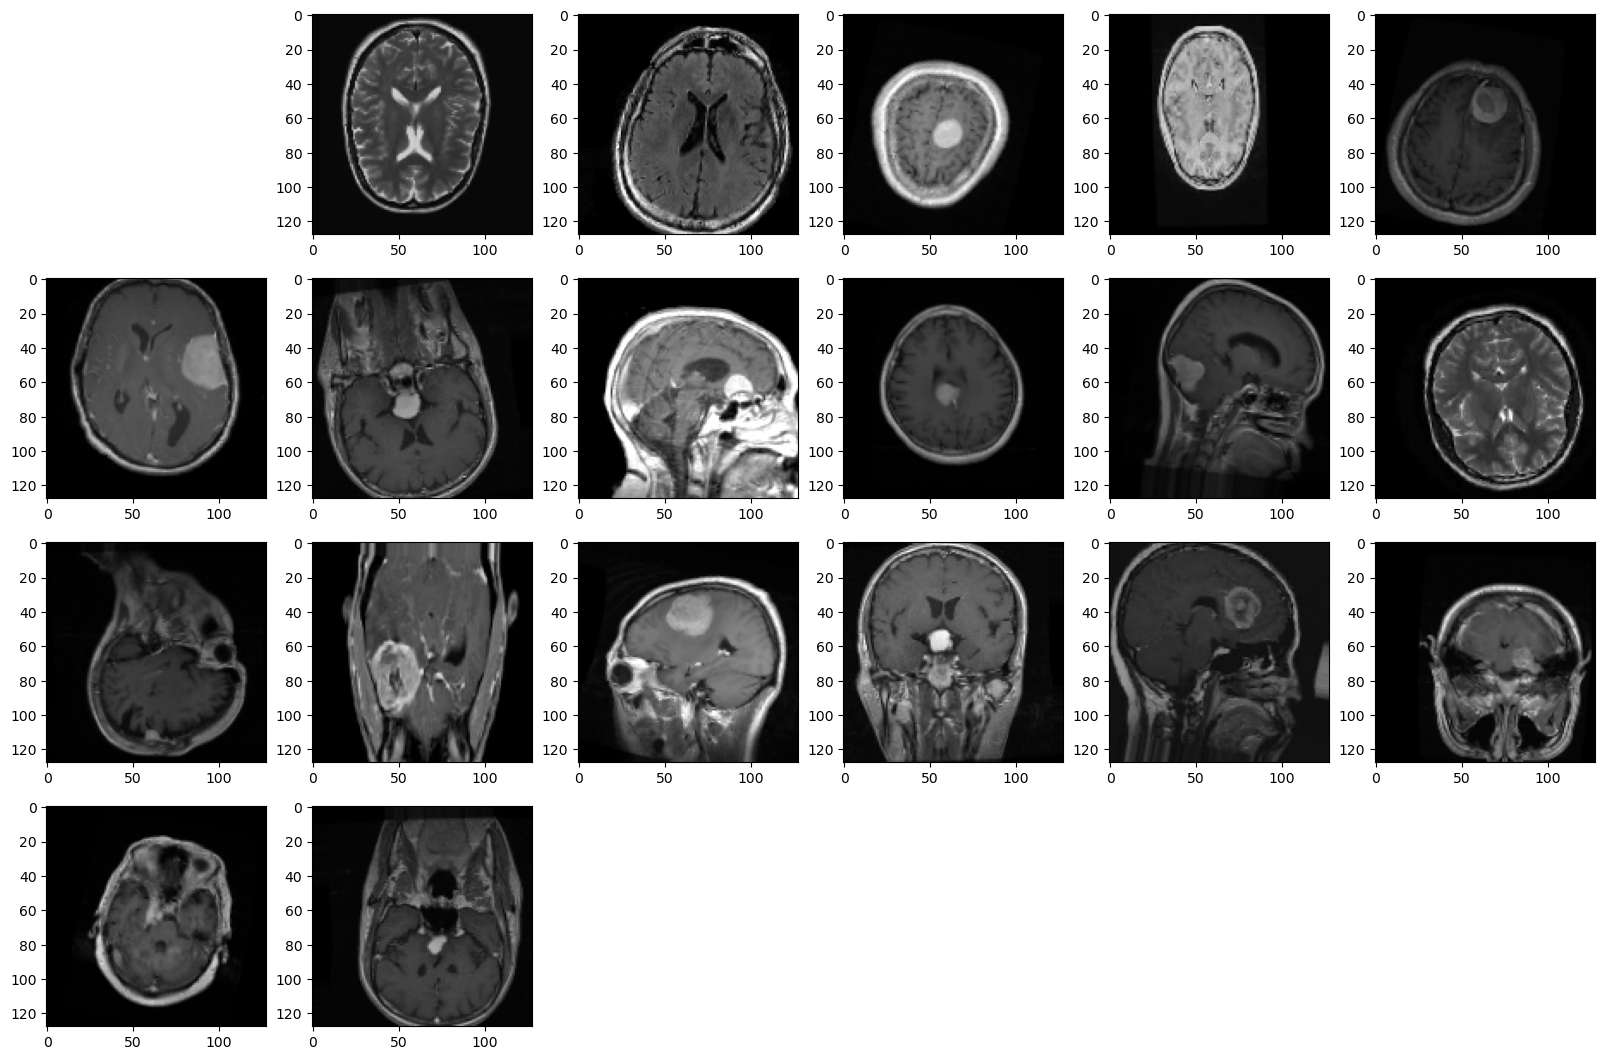

In [55]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
   
    for i in range(1,20):
        plt.subplot(6,6,i+1)
        plt.imshow(X_batch[i])
    # show the plot
    plt.show()
    break

In [56]:
vgg16_weight_path ='D:/download 3/New folder (2)/'

In [57]:
base_model=VGG16(include_top=False,weights='imagenet',input_shape=(128,128,3))

In [58]:
base_model.trainable=False

In [59]:
model = keras.Sequential([
    
    
    base_model, #vgg16
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
MODEL_PATH = 'saved-models/cnn'


In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_4 (Dropout)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [61]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [73]:
history=model.fit(train_generator, epochs=10, validation_data=validation_generator)    

Epoch 1/10
20/20 [==============================] - 81s 4s/step - loss: 0.2621 - accuracy: 0.8841 - val_loss: 0.2237 - val_accuracy: 0.9084
Epoch 2/10
20/20 [==============================] - 88s 4s/step - loss: 0.2445 - accuracy: 0.8943 - val_loss: 0.2164 - val_accuracy: 0.9163
Epoch 3/10
20/20 [==============================] - 86s 4s/step - loss: 0.2263 - accuracy: 0.8991 - val_loss: 0.2588 - val_accuracy: 0.9005
Epoch 4/10
20/20 [==============================] - 85s 4s/step - loss: 0.2359 - accuracy: 0.9022 - val_loss: 0.2077 - val_accuracy: 0.9194
Epoch 5/10
20/20 [==============================] - 87s 4s/step - loss: 0.2310 - accuracy: 0.9093 - val_loss: 0.2011 - val_accuracy: 0.9115
Epoch 6/10
20/20 [==============================] - 91s 5s/step - loss: 0.2406 - accuracy: 0.8951 - val_loss: 0.2728 - val_accuracy: 0.8863
Epoch 7/10
20/20 [==============================] - 87s 4s/step - loss: 0.2362 - accuracy: 0.8991 - val_loss: 0.2367 - val_accuracy: 0.9084
Epoch 8/10
20/20 [==

In [74]:
Model_evaluation = model.evaluate(validation_generator)
print(f"Loss: {Model_evaluation[0]*100:.2f} %\nAccuracy: {Model_evaluation[1]:.4f} %")

10/10 [==============================] - 27s 3s/step - loss: 0.1937 - accuracy: 0.9273
Loss: 19.37 %
Accuracy: 0.9273 %


In [75]:
tf.keras.models.save_model(model,'model.h5')

In [76]:
predictions = model.predict(validation_generator)

10/10 [==============================] - 27s 3s/step


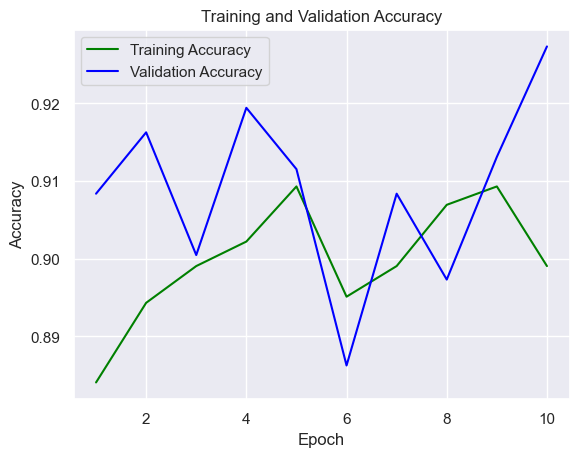

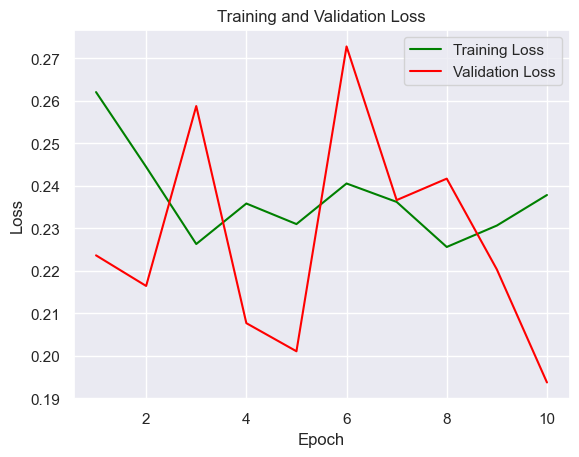

In [77]:

import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

<AxesSubplot:>

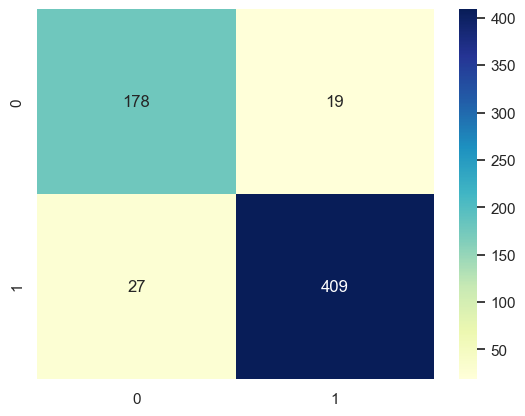

In [78]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_generator.classes, predictions.round())

sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [79]:
from sklearn.metrics import classification_report
print(classification_report(validation_generator.classes, predictions.round())) #.argmax(axis=-1)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       197
           1       0.96      0.94      0.95       436

    accuracy                           0.93       633
   macro avg       0.91      0.92      0.92       633
weighted avg       0.93      0.93      0.93       633



1/1 [==============================] - 2s 2s/step
Tumor


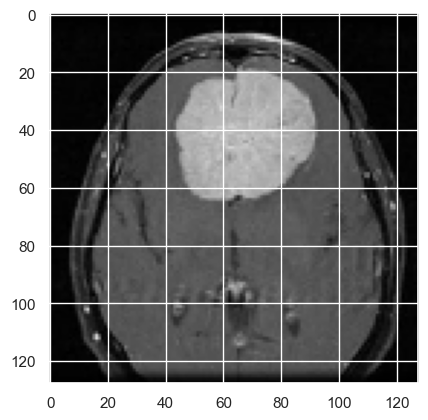

In [80]:
from skimage import io

img_path = 'D:/download 3/archive (6)/Data Devided/train/tumor/image(2).jpg'


img = io.imread(img_path)
x =cv2.resize(img,(128, 128))
imgplot = plt.imshow(x)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)[0]
 
if (preds >=0.5):
    print("Tumor")
else :
    print("no tumor")

In [81]:
import tensorflow as tf

def saliency_map(img):
    
    
    plt.imshow(img)

    x = tf.Variable(np.expand_dims(img, 0), dtype='float32')

    with tf.GradientTape() as tape:
        result = model(x)
        y = result[:, np.argmax(result)]
        grads = tape.gradient(y, x)

    grads_2d = grads.numpy()[0].max(axis=2)
    grads_2d_norm = (grads_2d - grads_2d.min())/(grads_2d.max() - grads_2d.min())

    grads_2d_uint8 = (grads_2d_norm*255.0).astype('uint8')
    _, grads_2d_bin = cv2.threshold(grads_2d_uint8, 0, 255, cv2.THRESH_OTSU)
    plt.imshow(grads_2d_bin, cmap='gray')
    plt.show()
    
    print(classes[np.argmax(result)])

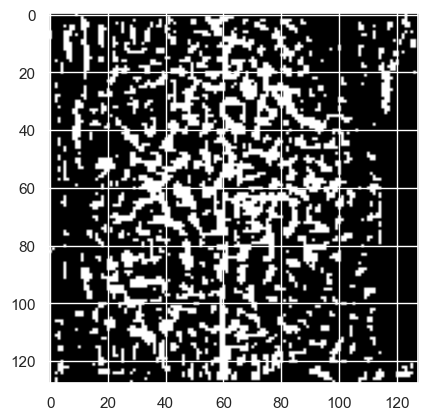

no_tumor


In [82]:
img = validation_generator[0][0][11]
saliency_map(img)    